# Sistem Rekomendasi : Film

## Content Based Filtering

### Data Understanding

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
!gdown 1O72Dk-39aDykDIbGtvblCiBhzdqoJZt-

Downloading...
From: https://drive.google.com/uc?id=1O72Dk-39aDykDIbGtvblCiBhzdqoJZt-
To: /content/movies.csv
100% 485k/485k [00:00<00:00, 29.9MB/s]


In [3]:
!gdown 1lG9UpK-auXf-f_kNHPy4nAoXfwZhaukH

Downloading...
From: https://drive.google.com/uc?id=1lG9UpK-auXf-f_kNHPy4nAoXfwZhaukH
To: /content/ratings.csv
100% 2.38M/2.38M [00:00<00:00, 81.7MB/s]


In [4]:
movie = pd.read_csv('/content/movies.csv')
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
movie.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
print('Banyak data: ', len(movie.movieId.unique()))
print('Jumlah judul: ', len(movie.title.unique()))
print('Jenis genre film: ', len(movie.genres.unique()))
print('Jenis genre film: ', movie.genres.unique())

Banyak data:  9742
Jumlah judul:  9737
Jenis genre film:  951
Jenis genre film:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adv

In [9]:
movie.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [10]:
rating = pd.read_csv('/content/ratings.csv')
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [11]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [12]:
rating.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [13]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [14]:
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [15]:
print('Jumlah userId: ', len(rating.userId.unique()))
print('Jumlah movieId: ', len(rating.movieId.unique()))

Jumlah userId:  610
Jumlah movieId:  9724


### Exploratory Data Analysis

#### Univariate

##### Movie Variabel

In [16]:
movie.groupby('genres')['genres'].agg('count')

genres
(no genres listed)                     34
Action                                 60
Action|Adventure                       32
Action|Adventure|Animation             18
Action|Adventure|Animation|Children     6
                                       ..
Sci-Fi|Thriller                        23
Sci-Fi|Thriller|IMAX                    1
Thriller                               84
War                                     4
Western                                23
Name: genres, Length: 951, dtype: int64

##### Rating Variabel

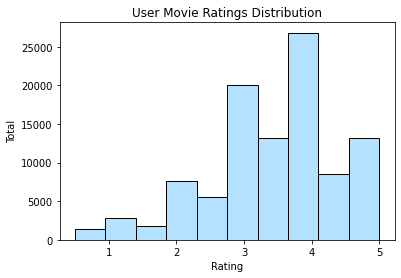

In [17]:
plt.hist(rating.rating, color='#B4E1FF', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Rating')
plt.title("User Movie Ratings Distribution")
plt.show()

### Multivariate

In [18]:
rating_contribution = rating.groupby('movieId').count()
rating_contribution.head(3)

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52


In [19]:
name_movie_rating_contribution = pd.merge(rating_contribution, movie, on = 'movieId', how = 'left')
name_movie_rating_contribution.sort_values(by = 'rating', ascending = False).head(10)

,movieId,userId,rating,timestamp,title,genres
314,356,329,329,329,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,317,317,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,307,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,279,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,278,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller
224,260,251,251,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
418,480,238,238,238,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
97,110,237,237,237,Braveheart (1995),Action|Drama|War
507,589,224,224,224,Terminator 2: Judgment Day (1991),Action|Sci-Fi
461,527,220,220,220,Schindler's List (1993),Drama|War


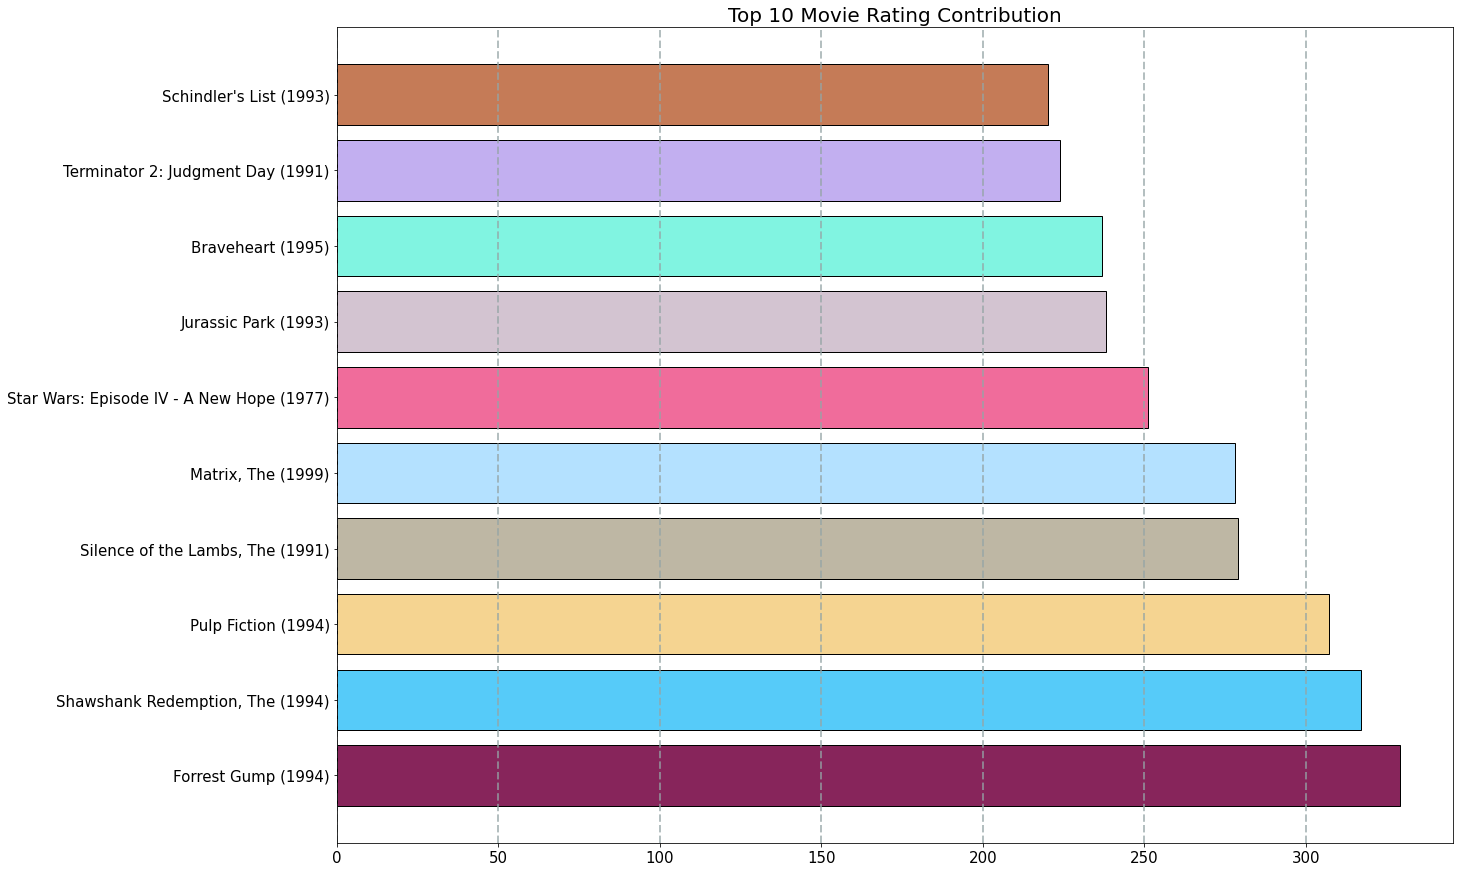

In [20]:
plt.figure(figsize = (20,15))
top10_movie = name_movie_rating_contribution[['title', 'rating']].sort_values(by = 'rating', ascending = False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']

labels = top10_movie[['title']].values.flatten()
values = top10_movie[['rating']].values.flatten()

plt.barh(labels, values, color = colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Top 10 Movie Rating Contribution", fontdict = {'fontsize' : 20})
plt.show()

### Data Preprocessing

#### Menggabungkan Film

In [21]:
movie = pd.merge(rating, movie , on = 'movieId', how = 'left')
movie

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [22]:
movie.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [23]:
movie.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

### Data Preparation

#### Hapus Duplikasi

In [24]:
movie = movie.drop_duplicates('movieId')
movie

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100820,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100821,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100823,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100827,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [25]:
movie_id = movie['movieId'].tolist()
movie_title = movie['title'].tolist()
movie_genre = movie['genres'].tolist()
 
print(len(movie_id))
print(len(movie_title))
print(len(movie_genre))

9724
9724
9724


In [26]:
movie_new = pd.DataFrame({
    'id': movie_id,
    'title': movie_title,
    'genre': movie_genre
})
movie_new

,id,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,6,Heat (1995),Action|Crime|Thriller
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...
9719,160341,Bloodmoon (1997),Action|Thriller
9720,160527,Sympathy for the Underdog (1971),Action|Crime|Drama
9721,160836,Hazard (2005),Action|Drama|Thriller
9722,163937,Blair Witch (2016),Horror|Thriller


### Model Developement

In [27]:
data = movie_new
data.sample(5)

,id,title,genre
1143,3435,Double Indemnity (1944),Crime|Drama|Film-Noir
8960,59667,Nina's Heavenly Delights (2006),Comedy
2483,27801,Ong-Bak: The Thai Warrior (Ong Bak) (2003),Action|Thriller
6417,4459,Alaska: Spirit of the Wild (1997),Documentary|IMAX
7136,27584,Dead End (2003),Comedy|Horror|Mystery|Thriller


#### TF-IDF Vectorizer

In [28]:
tf = TfidfVectorizer()
tf.fit(data['genre']) 
tf.get_feature_names() 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'genres',
 'horror',
 'imax',
 'listed',
 'musical',
 'mystery',
 'no',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

In [29]:
tfidf_matrix = tf.fit_transform(data['genre'])
tfidf_matrix.shape 

(9724, 24)

In [30]:
tfidf_matrix.todense()

matrix([[0.        , 0.41681721, 0.51634045, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.54896727, 0.        , 0.        , ..., 0.54222422, 0.        ,
         0.        ],
        ...,
        [0.64123095, 0.        , 0.        , ..., 0.63335461, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.62477687, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [31]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns = tf.get_feature_names(),
    index = data.title
).sample(22, axis = 1).sample(10, axis = 0)

,listed,war,horror,documentary,animation,musical,comedy,romance,mystery,adventure,...,fantasy,film,crime,drama,no,western,thriller,genres,fi,action
title,,,,,,,,,,,,,,,,,,,,,
Crazy Heart (2009),0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.841412,0.000000,0.000000,...,0.000000,0.0,0.000000,0.540394,0.0,0.0,0.000000,0.0,0.0,0.000000
Big Trouble in Little China (1986),0.0,0.0,0.0,0.0,0.000000,0.0,0.341781,0.000000,0.000000,0.532527,...,0.617144,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.467690
Mona Lisa Smile (2003),0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.841412,0.000000,0.000000,...,0.000000,0.0,0.000000,0.540394,0.0,0.0,0.000000,0.0,0.0,0.000000
Murder by Death (1976),0.0,0.0,0.0,0.0,0.000000,0.0,0.329855,0.000000,0.647217,0.000000,...,0.000000,0.0,0.523016,0.000000,0.0,0.0,0.445826,0.0,0.0,0.000000
Return to Treasure Island (1988),0.0,0.0,0.0,0.0,0.721671,0.0,0.373900,0.000000,0.000000,0.582571,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
Bad Boy Bubby (1993),0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
Wicked Blood (2014),0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.433226,0.0,0.0,0.633355,0.0,0.0,0.641231
Heavyweights (Heavy Weights) (1995),0.0,0.0,0.0,0.0,0.000000,0.0,0.468306,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
Field of Dreams (1989),0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.651781,0.0,0.000000,0.333713,0.0,0.0,0.000000,0.0,0.0,0.000000


#### Consine Similarity

In [32]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.15262722, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15262722, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.69543501, 0.33876915,
        0.        ],
       ...,
       [0.        , 0.        , 0.69543501, ..., 1.        , 0.39570531,
        0.        ],
       [0.        , 0.        , 0.33876915, ..., 0.39570531, 1.        ,
        0.78080334],
       [0.        , 0.        , 0.        , ..., 0.        , 0.78080334,
        1.        ]])

In [33]:
cosine_sim_df = pd.DataFrame(cosine_sim, index = data['title'], columns = data['title'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis = 1).sample(10, axis = 0)

Shape: (9724, 9724)


title,Hawks and Sparrows (Uccellacci e Uccellini) (1966),Alles Inklusive (2014),Can't Buy Me Love (1987),We Could Be King (2014),BMX Bandits (1983)
title,,,,,
Richie Rich (1994),0.468306,0.343867,0.267183,0.0,0.000000
Heidi (1937),0.000000,0.298705,0.000000,0.0,0.168966
"Winged Migration (Peuple migrateur, Le) (2001)",0.000000,0.000000,0.000000,1.0,0.000000
"Basketball Diaries, The (1995)",0.000000,0.678847,0.000000,0.0,0.383997
They (2002),0.000000,0.000000,0.000000,0.0,0.000000
Sweet Bird of Youth (1962),0.000000,0.678847,0.000000,0.0,0.383997
One Fine Day (1996),0.000000,0.366844,0.691031,0.0,0.207510
Kill Command (2016),0.000000,0.000000,0.000000,0.0,0.000000
Moulin Rouge (2001),0.000000,0.222693,0.419490,0.0,0.125969


#### Mendapatkan Rekomendasi

In [34]:
def movie_recommendations(title, similarity_data = cosine_sim_df, items = data[['title', 'genre']], k = 5):
    index = similarity_data.loc[:, title].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k + 2):-1]]
    closest = closest.drop(title, errors = 'ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [35]:
data[data.title.eq('Toy Story (1995)')]

,id,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [36]:
movie_recommendations('Toy Story (1995)')

,title,genre
0,Turbo (2013),Adventure|Animation|Children|Comedy|Fantasy
1,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
2,The Good Dinosaur (2015),Adventure|Animation|Children|Comedy|Fantasy
3,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy
4,Moana (2016),Adventure|Animation|Children|Comedy|Fantasy


## Collaborative Filtering

### Data Understanding

In [37]:
df = rating
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### Data Preparation

In [38]:
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [39]:
movie_ids = df['movieId'].unique().tolist()

movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [40]:
df['user'] = df['userId'].map(user_to_user_encoded)

df['movie'] = df['movieId'].map(movie_to_movie_encoded)

In [41]:
num_users = len(user_to_user_encoded)
print(num_users)

num_movie = len(movie_encoded_to_movie)
print(num_movie)

df['rating'] = df['rating'].values.astype(np.float32)

min_rating = min(df['rating'])

max_rating = max(df['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of Movie: 9724, Min Rating: 0.5, Max Rating: 5.0


#### Membagi Data untuk Training dan Validasi

In [42]:
df = df.sample(frac = 1, random_state = 42)
df

,userId,movieId,rating,timestamp,user,movie
67037,432,77866,4.5,1335139641,431,4730
42175,288,474,3.0,978465565,287,474
93850,599,4351,3.0,1498524542,598,2631
6187,42,2987,4.0,996262677,41,194
12229,75,1610,4.0,1158989841,74,727
...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873
54886,364,141,4.0,869443367,363,524
76820,480,6867,4.0,1179163171,479,2240
860,6,981,3.0,845556567,5,712


In [43]:
x = df[['user', 'movie']].values

y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


### Proses Training

In [44]:
import tensorflow as tf
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.movie_embedding = layers.Embedding(
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1)
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    movie_vector = self.movie_embedding(inputs[:, 1])
    movie_bias = self.movie_bias(inputs[:, 1])
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x)

In [45]:
model = RecommenderNet(num_users, num_movie, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [46]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
10084/10084 [==============================] - 49s 4ms/step - loss: 0.6264 - root_mean_squared_error: 0.2220 - val_loss: 0.6124 - val_root_mean_squared_error: 0.2058
Epoch 2/100
10084/10084 [==============================] - 44s 4ms/step - loss: 0.6049 - root_mean_squared_error: 0.1985 - val_loss: 0.6085 - val_root_mean_squared_error: 0.2013
Epoch 3/100
10084/10084 [==============================] - 41s 4ms/step - loss: 0.6000 - root_mean_squared_error: 0.1928 - val_loss: 0.6072 - val_root_mean_squared_error: 0.1996
Epoch 4/100
10084/10084 [==============================] - 41s 4ms/step - loss: 0.5970 - root_mean_squared_error: 0.1892 - val_loss: 0.6070 - val_root_mean_squared_error: 0.1993
Epoch 5/100
10084/10084 [==============================] - 40s 4ms/step - loss: 0.5958 - root_mean_squared_error: 0.1878 - val_loss: 0.6069 - val_root_mean_squared_error: 0.1990
Epoch 6/100
10084/10084 [==============================] - 41s 4ms/step - loss: 0.5947 - root_mean_squared_err

### Visualisasi Metrik

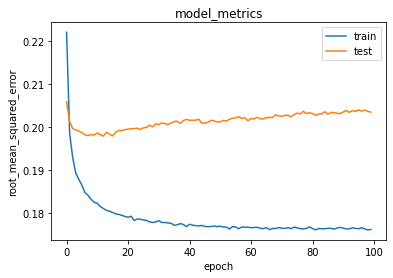

In [47]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

### Mendapatkan Rekomendasi Movie

In [48]:
movie_df = movie_new
df = pd.read_csv('ratings.csv')

user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]

movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id'] 
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [49]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending = False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genre)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genre)

292/292 [==============================] - 1s 2ms/step
Showing recommendations for users: 517
Movie with high ratings from user
--------------------------------
E.T. the Extra-Terrestrial (1982) : Children|Drama|Sci-Fi
Love Actually (2003) : Comedy|Drama|Romance
Home Alone 2: Lost in New York (1992) : Children|Comedy
Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005) : Adventure|Children|Fantasy
Hugo (2011) : Children|Drama|Mystery
--------------------------------
Top 10 movie recommendation
--------------------------------
Trial, The (Procès, Le) (1962) : Drama
What Men Talk About (2010) : Comedy
Alesha Popovich and Tugarin the Dragon (2004) : Animation|Comedy|Drama
Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976) : Comedy
Adam's Rib (1949) : Comedy|Romance
Heidi Fleiss: Hollywood Madam (1995) : Documentary
Awfully Big Adventure, An (1995) : Drama
Stunt Man, The (1980) : Action|Adventure|Comedy|Drama|Romance|Thriller
Enter the Void 